In [1]:
source("utils.R")

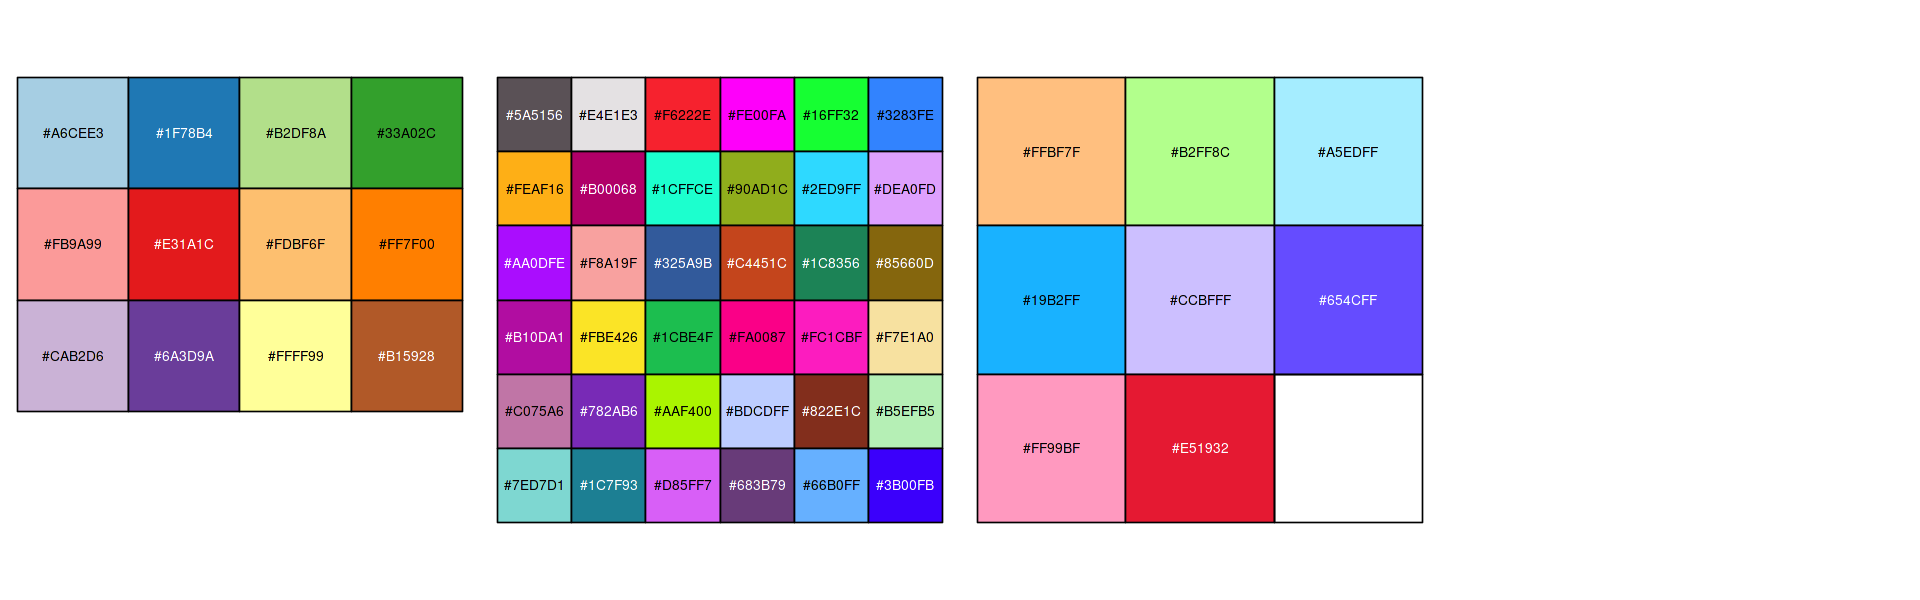

In [28]:
options(repr.plot.width=16, repr.plot.height=5)
par(mfrow=c(1,4))

library(colorBlindness)
names(PairedColor12Steps) <- NULL
my_col_method <- PairedColor12Steps[c(1,5,7,8,9,10,11,12)]

show_col(my_col_m)
show_col(my_col_c)
show_col(my_col_method)
# show_col(my_color_2)
# show_col(my_color_3)
# show_col(my_color_4)

In [3]:
file1 <- "../result_files/results_meta_data.tsv"
file2 <- "../result_files/results_all_metrics.tsv"
df <- read.table(file1, sep='\t', header=TRUE)
df_metrics <- read.table(file2, sep='\t', header=TRUE)

In [7]:
k_ls <- c(10, 13, 10, 9, 13, 15)

In [20]:
df15 <- df %>% filter(ndim==15)
df15 <- df15 %>% filter(!resolution == "latent_space")
dim(df15)

[1] 2807   19

In [5]:
head(df15)

,file,scenario,workflow,method,feature_type,tile_size,distance,ndim,seed,filename,resolution,rds_file,clustering_file,long_method,snn_file,n_clusters,dataset,dataset2,k_optimal
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed0/r0.05_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,0,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed0/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/seed0/r0.05.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
2,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed2/r0.05_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,2,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed2/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/seed2/r0.05.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
3,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed5/r0.05_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,5,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed5/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/seed5/r0.05.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
4,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed42/r0.05_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,42,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed42/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/seed42/r0.05.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
5,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed123/r0.05_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,123,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed123/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/seed123/r0.05.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
6,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed0/r0.1_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,0,r0.1_metrics.tsv,0.1,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/seed0/r0.1_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/seed0/r0.1.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,11,Cell line,Cell_line_mixing,10


In [21]:
df15$resolution <- as.numeric(df15$resolution)

In [22]:
hline_data <- data.frame(dataset = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"), hline_y = k_ls)
hline_data$dataset <- factor(hline_data$dataset , levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

In [23]:
df15 %>% filter(method == "aggregation" & seed == 0 & dataset == "Cell line")

file,scenario,workflow,method,feature_type,tile_size,distance,ndim,seed,filename,resolution,rds_file,clustering_file,long_method,snn_file,n_clusters,dataset,dataset2,k_optimal
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.05_metrics.tsv,Cell_line_mixing,evaluation,aggregation,default,500,default,15,0,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.05_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/seed0/r0.05.tsv,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.1_metrics.tsv,Cell_line_mixing,evaluation,aggregation,default,500,default,15,0,r0.1_metrics.tsv,0.10,Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.1_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/seed0/r0.1.tsv,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.15_metrics.tsv,Cell_line_mixing,evaluation,aggregation,default,500,default,15,0,r0.15_metrics.tsv,0.15,Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.15_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/seed0/r0.15.tsv,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.2_metrics.tsv,Cell_line_mixing,evaluation,aggregation,default,500,default,15,0,r0.2_metrics.tsv,0.20,Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.2_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/seed0/r0.2.tsv,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.3_metrics.tsv,Cell_line_mixing,evaluation,aggregation,default,500,default,15,0,r0.3_metrics.tsv,0.30,Cell_line_mixing/evaluation/aggregation/default/500/default/15/seed0/r0.3_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/seed0/r0.3.tsv,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
Cell_line_mixing/evaluation/aggregation/default/500/default/15/r0.05_metrics.tsv,Cell_line_mixing,evaluation,aggregation,default,500,default,15,0,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/aggregation/default/500/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/r0.05.tsv,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
Cell_line_mixing/evaluation/aggregation/default/500/default/15/r0.1_metrics.tsv,Cell_line_mixing,evaluation,aggregation,default,500,default,15,0,r0.1_metrics.tsv,0.10,Cell_line_mixing/evaluation/aggregation/default/500/default/15/r0.1_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/r0.1.tsv,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
Cell_line_mixing/evaluation/aggregation/default/500/default/15/r0.15_metrics.tsv,Cell_line_mixing,evaluation,aggregation,default,500,default,15,0,r0.15_metrics.tsv,0.15,Cell_line_mixing/evaluation/aggregation/default/500/default/15/r0.15_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/r0.15.tsv,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10,Cell line,Cell_line_mixing,10
Cell_line_mixing/evaluation/aggregation/default/500/default/

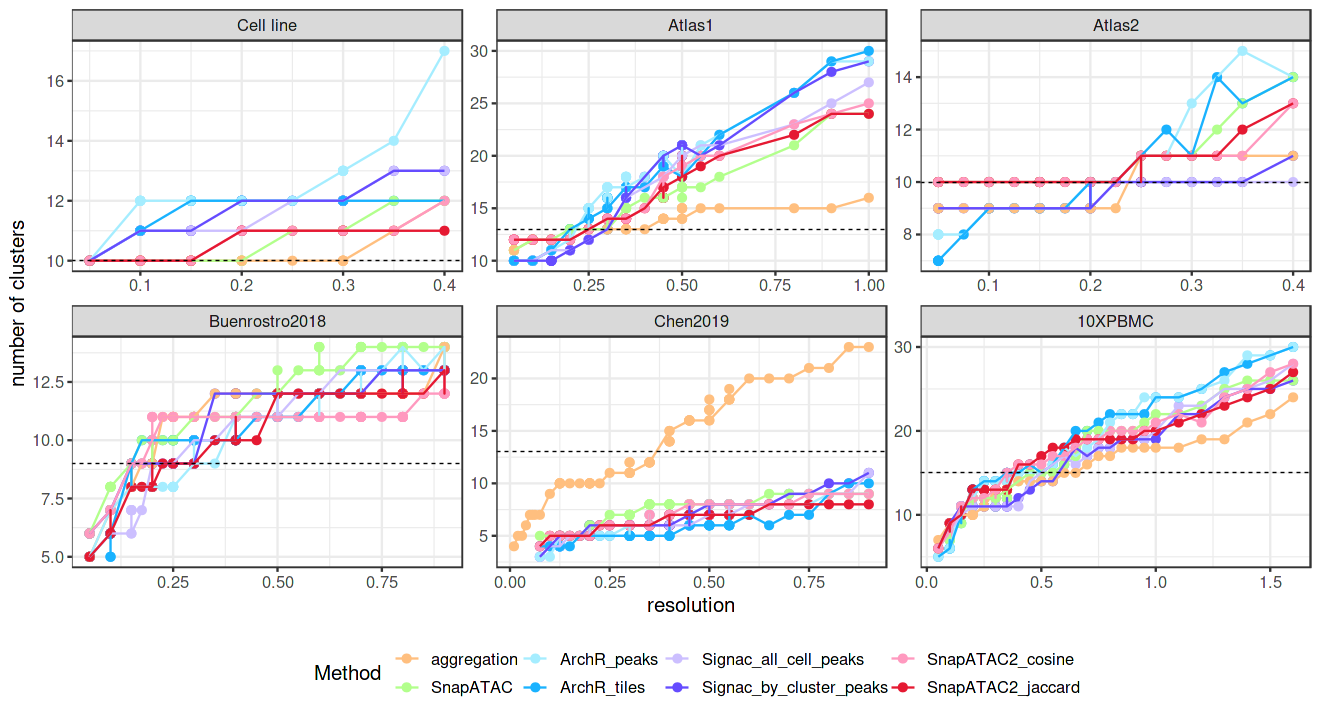

In [29]:
options(repr.plot.width=11, repr.plot.height=6)
df15$long_method <- factor(df15$long_method, levels=c("aggregation", "SnapATAC", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))
df15$dataset <- factor(df15$dataset, levels=c("Cell line", "Atlas1", "Atlas2", "Buenrostro2018", "Chen2019", "10XPBMC"))

p <- df15 %>% 
# filter(method == "aggregation" & seed == 0 & dataset == "Cell line") %>%
ggplot(aes(x=resolution, y=n_clusters, color=long_method, group=long_method)) +
geom_point(size=1.8) + 
geom_line(linewidth=0.5) +
facet_wrap(~dataset, scales = "free", ncol=3) + 
geom_hline(data = hline_data, aes(yintercept = hline_y), linetype = "dashed", color = "black", size=0.3) + 
xlab("resolution") +
ylab("number of clusters") +
theme_bw() +
labs(color="Method") +
theme(text = element_text(size = 12), ,legend.position = "bottom") +
scale_colour_manual(values = my_col_method) 
print(p)

In [30]:
pdf("../figures/ndim15.pdf", width=11, height=6)
print(p)
dev.off()

png 
  2